<a href="https://colab.research.google.com/github/aditi10998/Netflix_movies_and_TV_shows/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### **Importing important libraries**

In [29]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud


# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading files from google drive to colab and storing in a variable.
File1="/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [4]:
#Creating Dataframes from csv files
Netflix_df=pd.read_csv(File1)

**Peek the Data**

In [5]:
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


From the above operations head() and tail().We can conclude that there are nan values in some columns like director,country,etc.

In [7]:
Netflix_df.shape

(7787, 12)

This dataset consists of 7787 rows and 12 columns

**Statistical Summary**

In [8]:
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Since numerical column is release date we only get statistical summary of that column,Because by default describe only works on numerical columns

In [9]:
Netflix_df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


Statistical Summary for other attributes having object datatype.

In [10]:
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Here,we conclude that there are 7787 enteries and 12 columns in a dataset which occupies memory usage of 730.2+KB

In [11]:
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## **Feature Engineering**

In [12]:
#Checking null values
Netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We got null values in the columns director,cast,country,date_added and rating

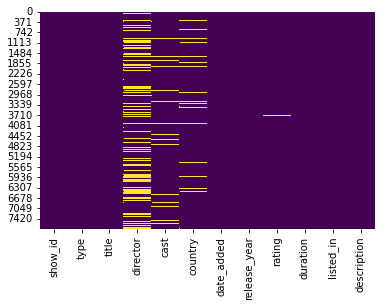

In [13]:
#Heatmap for null values
sns.heatmap(Netflix_df.isnull(),cbar=False,cmap='viridis')

In [14]:
#Handling missing values
Netflix_df.director.fillna("No Director",inplace=True)
Netflix_df.cast.fillna("No Cast",inplace=True)
Netflix_df.country.fillna("Country Unavailable",inplace=True)
Netflix_df.dropna(subset=["date_added",'rating'],inplace=True)

Here,Instead of simply dropping all the null values.We will treat each missing value is unavailable as dropping all missing values would be loss of important information.date_added and ratings have insignificant portion of data,so they are dropped from the dataset. 

In [15]:
Netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [16]:
Netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1421,s1422,Movie,Close Enemies,David Oelhoffen,"Matthias Schoenaerts, Reda Kateb, Adel Bencher...","France, Belgium","January 29, 2020",2018,TV-MA,112 min,"Dramas, International Movies","After an ambush leaves his partner dead, drug ..."
2085,s2086,Movie,F.R.E.D.I.,Sean Olson,"Kelly Hu, Angus Macfadyen, Candace Cameron Bur...",United States,"December 15, 2018",2018,TV-PG,90 min,"Children & Family Movies, Sci-Fi & Fantasy","Venturing into the woods, high schooler James ..."
1238,s1239,TV Show,Castle and Castle,No Director,"Richard Mofe-Damijo, Dakore Akande, Bimbo Manu...",Nigeria,"February 14, 2020",2018,TV-MA,1 Season,"International TV Shows, TV Dramas","A pair of high-powered, successful lawyers fin..."
7590,s7591,Movie,Whindersson Nunes: Adult,Diego Pignataro,Whindersson Nunes,Brazil,"August 15, 2019",2019,TV-MA,69 min,Stand-Up Comedy,Brazilian YouTube sensation Whindersson Nunes ...
7425,s7426,TV Show,Violet Evergarden: Special,No Director,"Yui Ishikawa, Takehito Koyasu, Daisuke Namikaw...",Country Unavailable,"October 4, 2018",2018,TV-PG,1 Season,"Anime Series, International TV Shows, Romantic...",Auto Memory Doll Violet Evergarden writes lett...


In [17]:
#Checking if there are any duplicates
dupes=Netflix_df.duplicated()
dupes.sum()

0

In [18]:
#Converting date
Netflix_df["date_added"] = pd.to_datetime(Netflix_df['date_added']) 
Netflix_df['year']=Netflix_df['date_added'].dt.year
Netflix_df['month']=Netflix_df['date_added'].dt.month
Netflix_df['week']=Netflix_df['date_added'].dt.week

In [19]:
del Netflix_df['date_added']

In [20]:
Netflix_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,week
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,33
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,51
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,51
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,46
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [21]:
Netflix_df['type'].values

array(['TV Show', 'Movie', 'Movie', ..., 'Movie', 'TV Show', 'Movie'],
      dtype=object)

In [22]:
Netflix_df['release_year'].dtype

dtype('int64')

In [23]:
Netflix_df['release_year']=pd.to_datetime(Netflix_df['release_year'])

In [24]:
Netflix_df['release_year'].dtype

dtype('<M8[ns]')

## **Exploratory Data Analysis**

**Type of Netflix Content** 

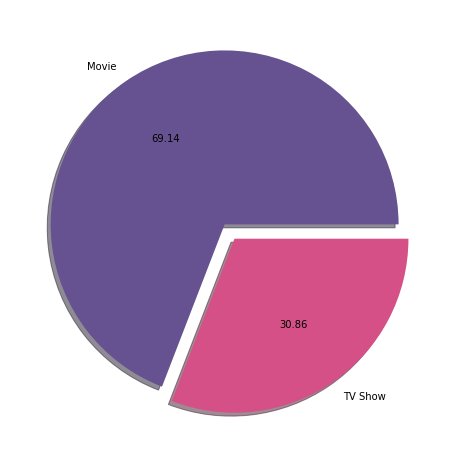

In [25]:
#No of movies and TV shows in attribute type

fig,ax1 = plt.subplots(figsize=(12,8))
explode = [0, 0.1]
colors = ["#665191","#d45087"]
types =Netflix_df.groupby('type').size()
plt.pie(types,labels=['Movie','TV Show'],explode=explode,colors=colors,shadow=True,autopct='%.2f')
plt.show()

**Conclusion**:There are more no of movies then TV Shows

**Ratings for Movies and TV Shows**

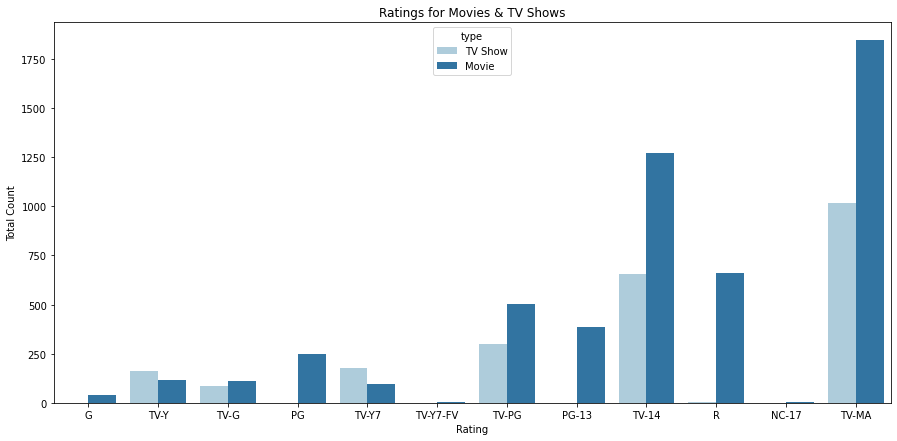

In [60]:
#Rating for movies and TV shows
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(Netflix_df.rating, hue=Netflix_df.type, order=order, palette='Paired');
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


Note:ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

 **Content added over the years**

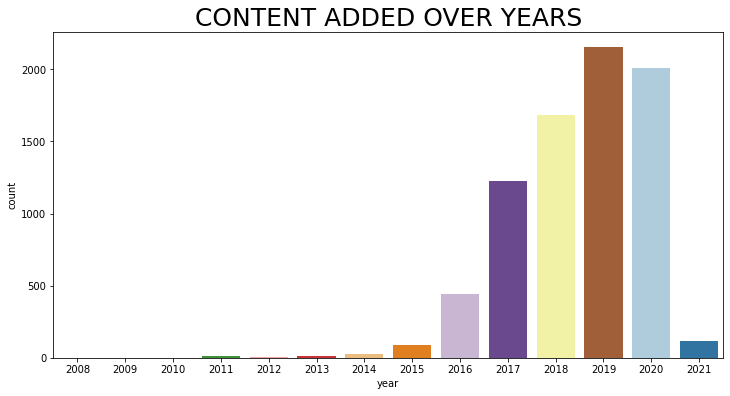

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(Netflix_df["year"],palette='Paired')
plt.title("CONTENT ADDED OVER YEARS",fontsize=25)
plt.show()


**Conclusion**:Most of the TV shows and movies were added in the years 2018,2019 and 2020.

Where 2019 was the year when most number of content was added.

**Type of Content added over the years**

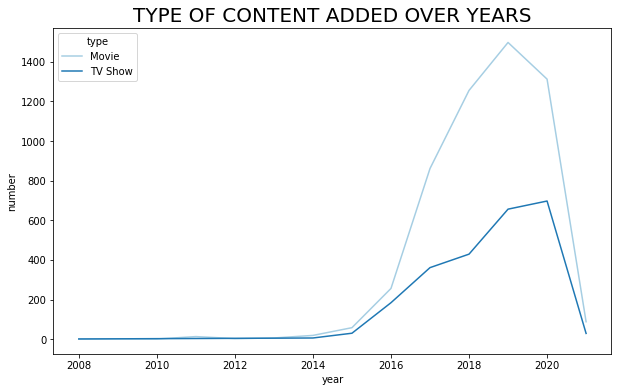

In [ ]:
new=Netflix_df[["type","year"]].value_counts().reset_index()
new.columns=["type","year","number"]
new
plt.figure(figsize=(10,6))
sns.lineplot(data=new,x="year",y="number",hue="type",palette='Paired')
plt.title("TYPE OF CONTENT ADDED OVER YEARS",fontsize=20)
plt.show()

**Conclusion**:


*   Most movies were added in late 2018
*   While,Most TV shows were added in pre-2020.



**Which Country has most number of Shows/Movies on Netflix**

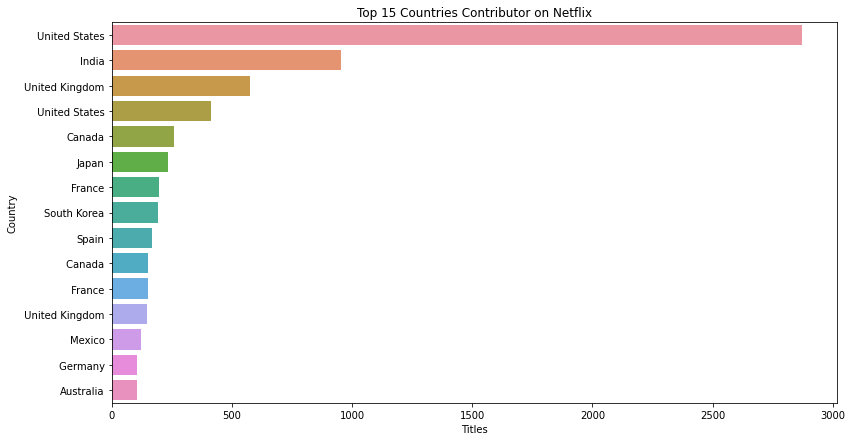

In [56]:
filtered_countries = Netflix_df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[0:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()


**Conclusion**:

*   Most of the Content is created in United States.
*   India follows up in second position for generating content on netflix.

*  Brazil produces low content among other 15 Countries






**Director with most Number of movies**

In [ ]:
movie =Netflix_df[( Netflix_df['type']=='Movie') & (Netflix_df['director']!='No Director')]

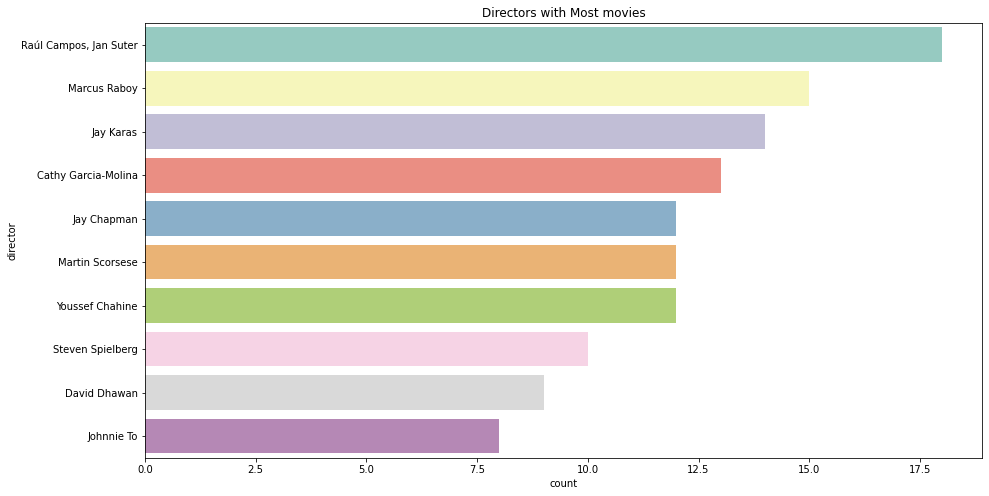

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Directors with Most movies')
sns.countplot(y='director',data=movie,order=movie['director'].value_counts().index[0:10],palette='Set3')

**Conclusion**:

*   Raul Campus,Jan Suter has most Number of movies.
*   While,Johnnie To ranks lowest in top 10 directors list.



### **Top 5 Genres on Netflix**

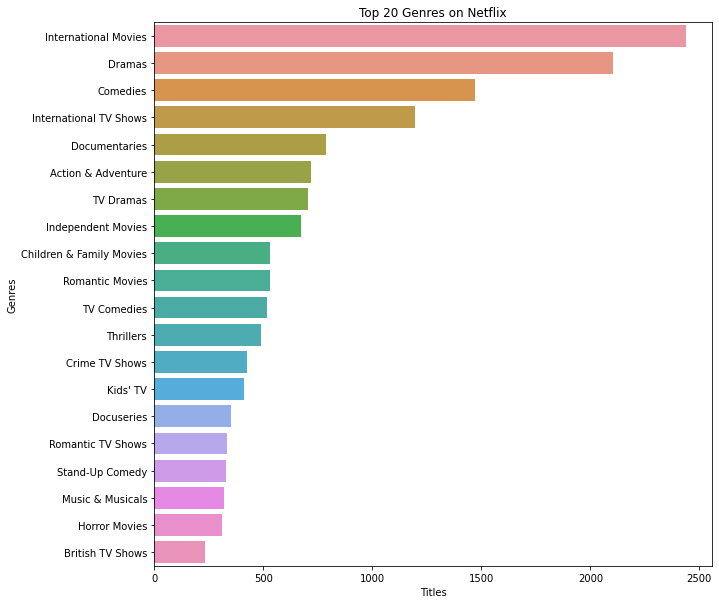

In [58]:
filtered_genres = Netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


From the graph, we know that International Movies take the first place, followed by dramas and comedies.


**Average duration of Movies**

In [ ]:
duration = []
movie = movie[movie['duration'].notna()]
for i in movie['duration']:
    duration.append(int(i.strip('min')))

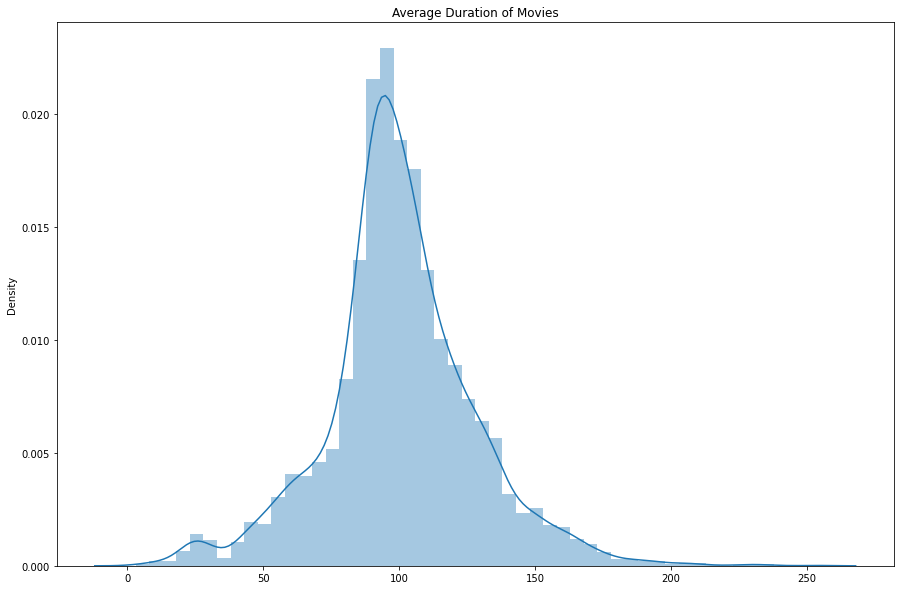

In [ ]:
plt.figure(1,figsize=(15,10))
plt.title("Average Duration of Movies")
sns.distplot(duration)


**Conclusion**:Most of the movie durations are of 2 hours.

In [ ]:
series = Netflix_df[Netflix_df['type']=='TV Show']


**Average No of Seasons in TV Shows**

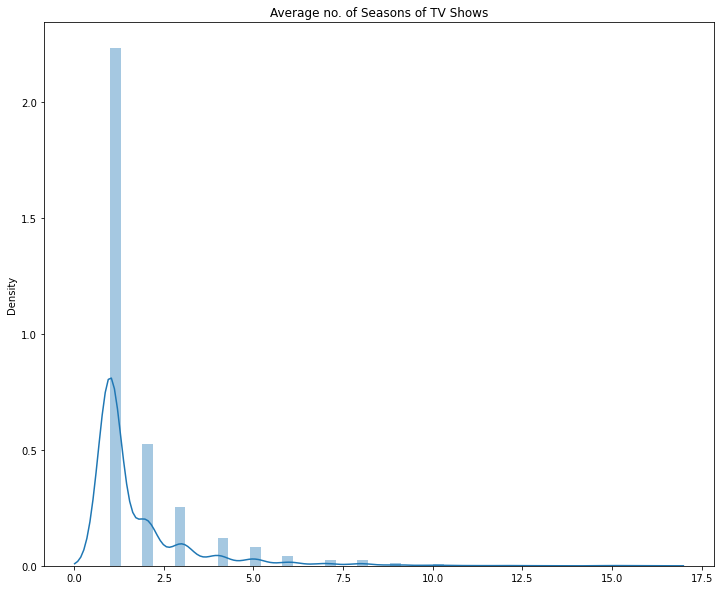

In [ ]:
durationSeries = []
tvshow = series[series['duration'].notna()]
for i in tvshow['duration']:
    durationSeries.append(int(i.strip('Season')))

plt.figure(figsize=(12,10))
plt.title('Average no. of Seasons of TV Shows')
sns.distplot(durationSeries)


**Conclusion**:Most TV shows has 1 season

## **Wordcloud**

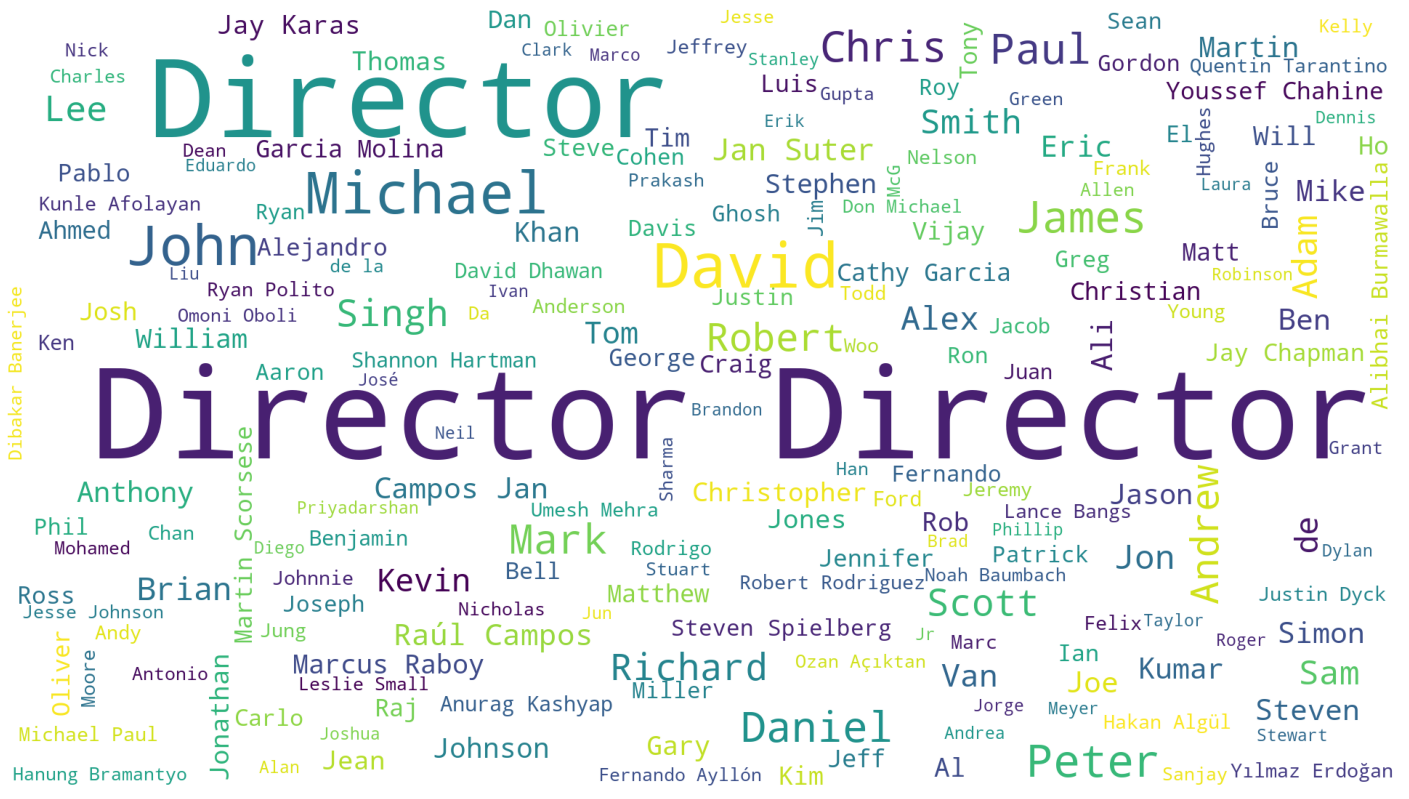

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(Netflix_df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()



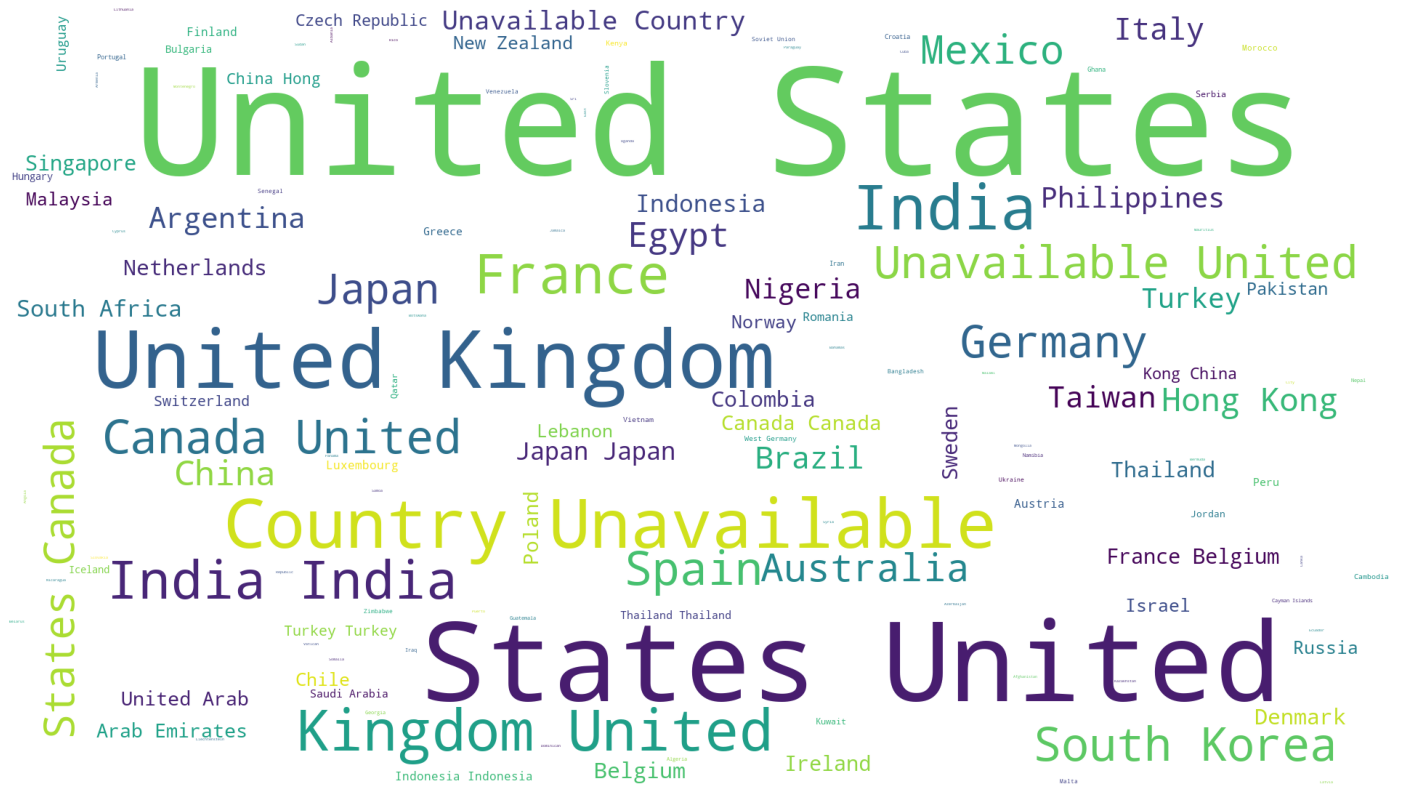

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(Netflix_df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

# **Models** 

**K-means clustering**

In [27]:
list_description=Netflix_df['description'].tolist()
list_description

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.',
 'A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.',
 'After an awful accident, a couple admitted to a grisly hospital are separated and must find each o

In [30]:
#using  lower() method for Changing the string into lower case
list_description = [low.lower() for low in list_description]
#using sub() function for Handling all the urls and (@) present in list_description variable 
list_description = [re.sub("\w+://\S+","", urls) for urls in list_description]
list_description=[re.sub("@\w+","", handles) for handles in list_description]


In [32]:
#using tokenization functions for the text present in list_description variable
list_description= [word_tokenize(word) for word in list_description]


In [33]:
#Removing stopwords and punctuation from the description feature 
removing_stopwords= stopwords.words("english")
removing_punctuation= list(punctuation)
removing_punctuation.extend(['...','``',"''",".."])
removing_context= ['rt', 'amp',"'s"]
final_variable= removing_stopwords + removing_punctuation + removing_context


In [35]:
#defining final_stop function to remove the stop words
def final_stop(final):
    return [re.sub("#","",term) for term in final if ((term not in final_variable) & (len(term)>1))]
content_clean = [final_stop(clean) for clean in list_description]


In [36]:
#creating a cleaned_list where all the words of the cleaned data is present and getting top 10 words using counter over top_term variable 
cleaned_list= []
for i in content_clean:
    cleaned_list.extend(i)
top_terms= Counter(cleaned_list)
top_terms.most_common(10)

[('life', 705),
 ('young', 655),
 ('new', 603),
 ('family', 550),
 ('world', 476),
 ('man', 472),
 ('love', 440),
 ('two', 434),
 ('woman', 427),
 ('friends', 383)]

In [37]:
#using join method to form a string by Joining all the words 
content_clean = [" ".join(label) for label in content_clean]


## **TFIDF**

In [38]:
#tfid_vectorizer variable 
tfid_vectorizer= TfidfVectorizer()


In [39]:
#using tfid_vectorizer for fiting content_clean variable and converting it into arrays 
content_tfidf = tfid_vectorizer.fit_transform(content_clean).toarray()


In [40]:
#shape of content_tfidf
content_tfidf.shape


(7770, 18073)